### In this assignment we have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

In [1]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-1-933d395af628>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
shampoo = pd.read_csv('C:/Users/User/Downloads/data sets/sales-of-shampoo-over-a-three-ye.csv')
shampoo

,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,2-Jan,145.9
2,3-Jan,183.1
3,4-Jan,119.3
4,5-Jan,180.3
5,6-Jan,168.5
6,7-Jan,231.8
7,8-Jan,224.5
8,9-Jan,192.8
9,10-Jan,122.9


In [3]:
type(shampoo)

pandas.core.frame.DataFrame

In [4]:
shampoo =pd.read_csv('C:/Users/User/Downloads/data sets/sales-of-shampoo-over-a-three-ye.csv',index_col=[0],parse_dates=True,squeeze=True)
shampoo

Month
1-Jan     266.0
2-Jan     145.9
3-Jan     183.1
4-Jan     119.3
5-Jan     180.3
6-Jan     168.5
7-Jan     231.8
8-Jan     224.5
9-Jan     192.8
10-Jan    122.9
11-Jan    336.5
12-Jan    185.9
1-Feb     194.3
2-Feb     149.5
3-Feb     210.1
4-Feb     273.3
5-Feb     191.4
6-Feb     287.0
7-Feb     226.0
8-Feb     303.6
9-Feb     289.9
10-Feb    421.6
11-Feb    264.5
12-Feb    342.3
1-Mar     339.7
2-Mar     440.4
3-Mar     315.9
4-Mar     439.3
5-Mar     401.3
6-Mar     437.4
7-Mar     575.5
8-Mar     407.6
9-Mar     682.0
10-Mar    475.3
11-Mar    581.3
12-Mar    646.9
Name: Sales of shampoo over a three year period, dtype: float64

In [5]:
type(shampoo)

pandas.core.series.Series

In [6]:
shampoo.size

36

<AxesSubplot:xlabel='Month'>

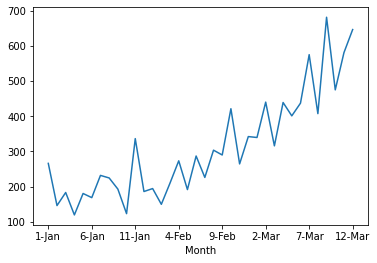

In [7]:
shampoo.plot()

<AxesSubplot:xlabel='Month'>

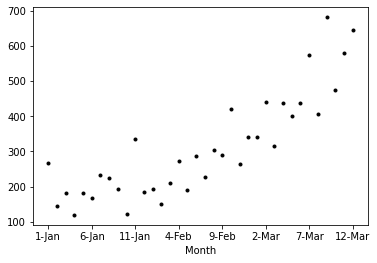

In [8]:
shampoo.plot(style = 'k.')

In [9]:
shampoo.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales of shampoo over a three year period, dtype: float64

In [10]:
shampoo_MA=shampoo.rolling(window=10).mean()
shampoo_MA

Month
1-Jan        NaN
2-Jan        NaN
3-Jan        NaN
4-Jan        NaN
5-Jan        NaN
6-Jan        NaN
7-Jan        NaN
8-Jan        NaN
9-Jan        NaN
10-Jan    183.51
11-Jan    190.56
12-Jan    194.56
1-Feb     195.68
2-Feb     198.70
3-Feb     201.68
4-Feb     212.16
5-Feb     208.12
6-Feb     214.37
7-Feb     217.69
8-Feb     235.76
9-Feb     231.10
10-Feb    254.67
11-Feb    261.69
12-Feb    280.97
1-Mar     293.93
2-Mar     310.64
3-Mar     323.09
4-Mar     338.32
5-Mar     355.85
6-Mar     369.23
7-Mar     397.79
8-Mar     396.39
9-Mar     438.14
10-Mar    451.44
11-Mar    475.60
12-Mar    496.25
Name: Sales of shampoo over a three year period, dtype: float64

<AxesSubplot:xlabel='Month'>

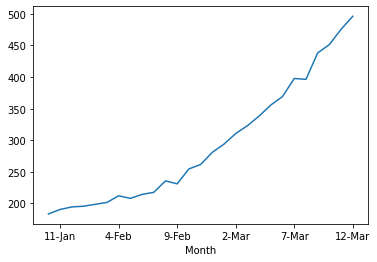

In [11]:
shampoo_MA.plot()

<AxesSubplot:xlabel='Month'>

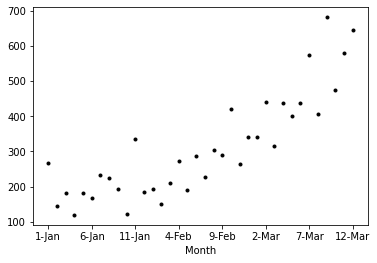

In [12]:
shampoo.plot(style= 'k.')

In [13]:
shampoo.head()

Month
1-Jan    266.0
2-Jan    145.9
3-Jan    183.1
4-Jan    119.3
5-Jan    180.3
Name: Sales of shampoo over a three year period, dtype: float64

In [14]:
shampoo_base= pd.concat([shampoo,shampoo.shift(1)],axis=1)
shampoo_base

,Sales of shampoo over a three year period,Sales of shampoo over a three year period
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3
7-Jan,231.8,168.5
8-Jan,224.5,231.8
9-Jan,192.8,224.5


In [15]:
shampoo_base.head()

,Sales of shampoo over a three year period,Sales of shampoo over a three year period
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3


In [16]:
# when the columns names  are same but columns content is different if we need for better understanding we can name them
shampoo_base.columns=[ 'Actual_sales','Predict_sales']
shampoo_base

,Actual_sales,Predict_sales
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3
7-Jan,231.8,168.5
8-Jan,224.5,231.8
9-Jan,192.8,224.5


In [17]:
shampoo_base.head()

,Actual_sales,Predict_sales
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3


In [18]:
shampoo_base.dropna(inplace=True)
shampoo_base.head()

,Actual_sales,Predict_sales
Month,,
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3


In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [20]:
shampoo_error = mean_squared_error(shampoo_base.Actual_sales,shampoo_base.Predict_sales)
shampoo_error

11715.388285714285

In [21]:
np.sqrt(shampoo_error)

108.23764726616282

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

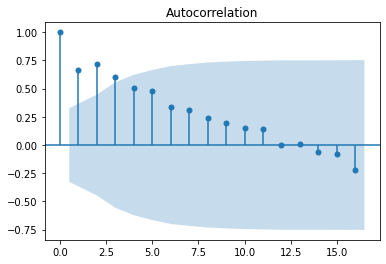

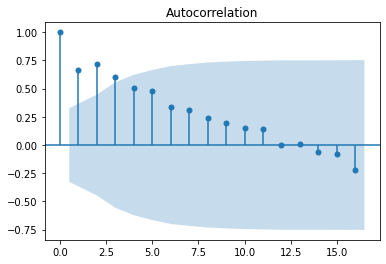

In [23]:
plot_acf(shampoo)

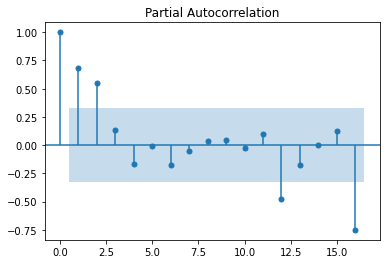

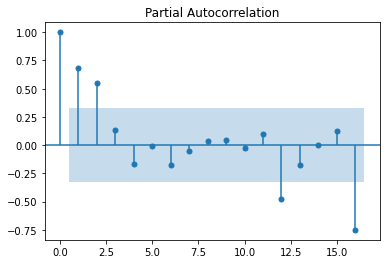

In [24]:
# Q =3,p=2,d= 0-2

plot_pacf(shampoo)

In [25]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_model import ARIMA
shampoo_train= shampoo[0:25]
shampoo_test = shampoo[25:36]

In [26]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




shampoo_model =ARIMA(shampoo_train,order=(3,1,2))

In [27]:
shampoo_model_fit = shampoo_model.fit()

In [28]:
shampoo_model_fit.aic

272.3891948071225

In [29]:
shampoo_forecast = shampoo_model_fit.forecast(steps=11)[0]

In [30]:
np.sqrt(mean_squared_error(shampoo_test,shampoo_forecast))

130.92710488561588

In [31]:
p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)

In [32]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order =(p,d,q)
            train,test = shampoo[0:25], shampoo[25:36]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train, order)
                    model_fit = model.fit(disp=0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = mean_squared_error(test,predictions)
                    print('ARIMAX%s MSE = %.2f'% (order,error))
                except:
                    continue

ARIMAX(0, 0, 0) MSE = 77950.15
ARIMAX(0, 0, 1) MSE = 70119.11
ARIMAX(0, 0, 2) MSE = 58566.69
ARIMAX(0, 0, 3) MSE = 62031.18
ARIMAX(0, 1, 0) MSE = 33849.87
ARIMAX(0, 1, 1) MSE = 40653.80
ARIMAX(0, 1, 2) MSE = 34511.83
ARIMAX(0, 1, 3) MSE = 41466.24
ARIMAX(0, 1, 4) MSE = 14452.72
ARIMAX(0, 2, 0) MSE = 34017.03
ARIMAX(0, 2, 1) MSE = 28398.49
ARIMAX(0, 2, 2) MSE = 24229.25
ARIMAX(0, 2, 3) MSE = 23028.11
ARIMAX(1, 0, 0) MSE = 61158.84
ARIMAX(1, 0, 1) MSE = 46528.99
ARIMAX(1, 0, 2) MSE = 43922.32
ARIMAX(1, 0, 3) MSE = 34856.92
ARIMAX(1, 1, 0) MSE = 31687.08
ARIMAX(1, 1, 1) MSE = 42176.67
ARIMAX(1, 2, 0) MSE = 18845.84
ARIMAX(1, 2, 1) MSE = 26129.55
ARIMAX(2, 0, 0) MSE = 45248.70
ARIMAX(2, 0, 1) MSE = 31679.80
ARIMAX(2, 1, 0) MSE = 35488.32
ARIMAX(2, 1, 1) MSE = 39633.99
ARIMAX(2, 1, 2) MSE = 35884.80
ARIMAX(2, 2, 0) MSE = 34024.30
ARIMAX(3, 0, 0) MSE = 46326.40
ARIMAX(3, 0, 2) MSE = 40721499.77
ARIMAX(3, 1, 0) MSE = 22024.85
ARIMAX(3, 1, 1) MSE = 22841.65
ARIMAX(3, 1, 2) MSE = 18095.37
ARIMA

In [33]:
# here the least value is 14492 and its squareroot is 120.38 this is my predicted or forecasted value in case of ARIMA 3,2,3